In [2]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

We should tryn to run this netowrk model in each cluster of what Christian did, get the final size dist. so we do not need to do recursicve calls and then run epidemic between clusters. 

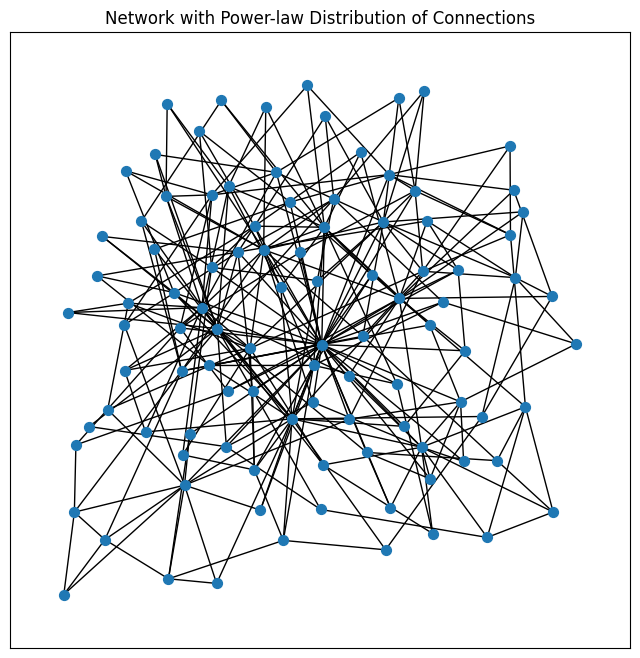

In [2]:
# Parameters for the network
n = 100  # Number of nodes
m = 3    # Number of edges to attach from a new node to existing nodes
p = 0.5  # Probability of creating a triangle (clustering)

# Create a network with power-law distribution of connections
G = nx.powerlaw_cluster_graph(n, m, p)

# Draw the network
plt.figure(figsize=(8, 8))
nx.draw_networkx(G, node_size=50, with_labels=False)
plt.title("Network with Power-law Distribution of Connections")
plt.show()


Total number of infected nodes: 30


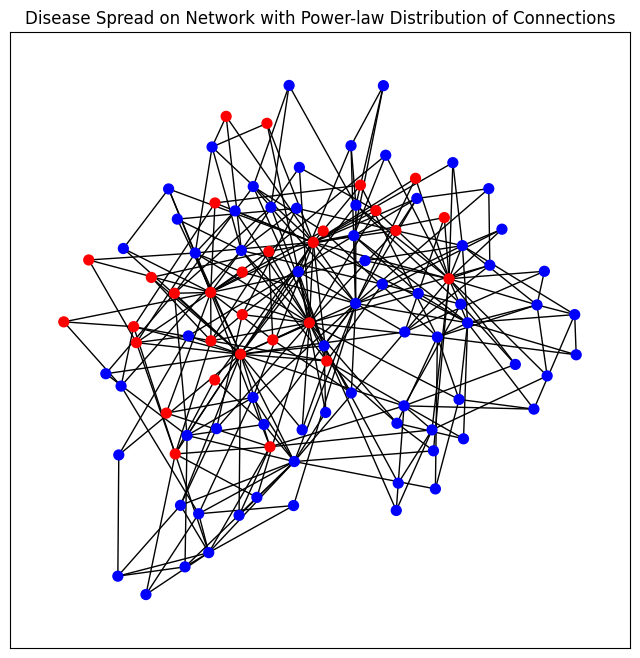

In [51]:
# Parameters for the network
n = 100  # Number of nodes
m = 3    # Number of edges to attach from a new node to existing nodes
cluster_p = 0.5  # Probability of clustering in network generation

# Disease spreading parameters
spread_prob = 0.6  # Probability of spreading to a neighboring node
s = 30             # Upper limit of infected nodes

# Create a network with power-law distribution of connections
G = nx.powerlaw_cluster_graph(n, m, cluster_p)

# Randomly initialize a node as the first infected node
initial_infected_node = random.choice(list(G.nodes()))
infected = set([initial_infected_node])

# Queue of nodes to process (start with the initial infected node)
to_process = [initial_infected_node]

# Spread the disease
while len(infected) < s and to_process:
    # Pop the first node in the list to process
    current_node = to_process.pop(0)
    
    # Go through neighbors and potentially infect them
    for neighbor in G.neighbors(current_node):
        if neighbor not in infected:  # Only consider uninfected nodes
            if random.random() < spread_prob:  # Spread with probability p
                infected.add(neighbor)
                to_process.append(neighbor)
                
        # Stop if we reach the limit of infected nodes
        if len(infected) >= s:
            break

# Print the number of infected nodes and display the result
print(f"Total number of infected nodes: {len(infected)}")

# Visualize the graph and infected nodes
node_colors = ['red' if node in infected else 'blue' for node in G.nodes()]

plt.figure(figsize=(8, 8))
nx.draw_networkx(G, node_size=50, node_color=node_colors, with_labels=False)
plt.title("Disease Spread on Network with Power-law Distribution of Connections")
plt.show()


In [27]:
# Parameters for the network
n = 100  # Number of nodes
p = 0.9    # Prob of attaching nodes

# Disease spreading parameters for first disease
spread_prob = 0.1  # Probability of spreading to a neighboring node
s = 3          # Upper limit of infected nodes

# Parameters for the second disease


fs = []
for i in tqdm(range(1000)):
    # Create G(n,p) Erdos-Renyi network
    G = nx.gnp_random_graph(n, p)

    # Randomly initialize a node as the first infected node
    initial_infected_node = random.choice(list(G.nodes()))
    infected = set([initial_infected_node])

    # Make queue of nodes to process
    to_process = [initial_infected_node]

    # Spread the first disease on network 
    while len(infected) < s and to_process:
        # Pop the first node in the list to process
        current_node = to_process.pop(0)
        
        # Go through neighbors and potentially infect them
        for neighbor in G.neighbors(current_node):
            if neighbor not in infected:  # Only consider uninfected nodes
                if random.random() < spread_prob:  # Spread with probability p
                    infected.add(neighbor)
                    to_process.append(neighbor)
                    
            # Stop if we reach the limit of infected nodes
            if len(infected) >= s:
                break

    # Create a subgraph of only infected nodes
    infected_subgraph = G.subgraph(infected)

    # Calculate the average degree of the infected nodes
    average_degree = sum(dict(infected_subgraph.degree()).values()) / len(infected_subgraph.nodes())

    # Determine the probability of transmission based on the given R0
    p_new_disease = .1

    # Now, spread the second disease on the subgraph
    initial_second_infected_node = random.choice(list(infected_subgraph.nodes()))
    second_infected = set([initial_second_infected_node])

    # Queue of nodes to process for the second disease
    to_process_second = [initial_second_infected_node]

    # Spread the second disease
    while to_process_second:
        current_node = to_process_second.pop(0)
        
        # Go through neighbors and potentially infect them
        for neighbor in infected_subgraph.neighbors(current_node):
            if neighbor not in second_infected:  # Only consider uninfected nodes
                if random.random() < p_new_disease:  # Spread based on calculated probability
                    second_infected.add(neighbor)
                    to_process_second.append(neighbor)
    fs.append(len(second_infected)/s)


100%|██████████| 1000/1000 [00:02<00:00, 396.50it/s]


(array([814.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 159.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  27.]),
 array([0.33333333, 0.34666667, 0.36      , 0.37333333, 0.38666667,
        0.4       , 0.41333333, 0.42666667, 0.44      , 0.45333333,
        0.46666667, 0.48      , 0.49333333, 0.50666667, 0.52      ,
        0.53333333, 0.54666667, 0.56      , 0.57333333, 0.58666667,
        0.6       , 0.61333333, 0.62666667, 0.64      , 0.65333333,
        0.66666667, 0.68      , 0.69333333, 0.70666667, 0.72      ,
        0.73333333, 0.74666667, 0.76      , 0.77333333, 0.78666667,
        0.8       , 0.81333333, 0.82666667, 0.84      , 0.85333333,
        0.86666667, 0.88      , 0.89333333, 0.90666667, 0.92      ,
        0.93333333, 0.94666667, 0.96      , 0.

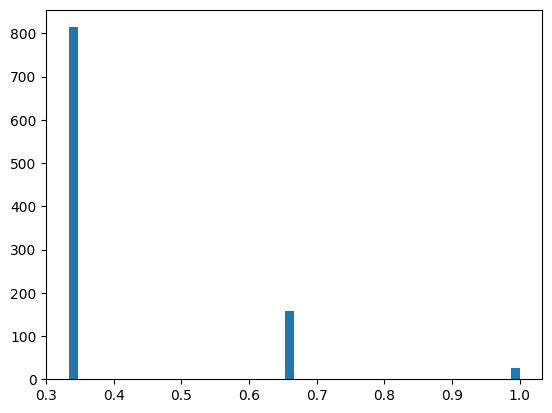

In [28]:
plt.figure()
plt.hist(fs, bins = 50)